In [ ]:
Projeto Ciência de Dados - Previsão de Vendas
Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
TV, Jornal e Rádio estão em milhares de reais
Vendas estão em milhões
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install jupyterlab_github
# Instalando o pandas profiling (executar apenas na 1a vez, depois comente esta linha)
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("andreaafs100766/Sprint-I/anuncio.csv")

In [ ]:
display(df)

In [ ]:
# Mostra as dimensões do dataset
df.shape

In [ ]:
# Mostra as 10 primeiras linhas do dataset
df.head(10)

In [ ]:
# Mostra as 10 últimas linhas do dataset
df.tail(10)

In [ ]:
# Mostra as informações do dataset
print(df.info())

In [ ]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
df.describe()

In [ ]:
# Verifica a distribuição das classes
df.groupby('Vendas').size()

In [ ]:
# Correlação de Pearson
df.corr(method = 'pearson')

In [ ]:
# Histograma
df.hist(figsize = (15,10))
plt.show()

In [ ]:
# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
  
 
sns.pairplot(df)
plt.show()
 


In [ ]:
# Density Plot
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

In [ ]:
# Boxplot
df.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

In [ ]:
# Matriz de Correlação com Seaborn
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot=True, cmap='RdBu', vmin=0, vmax=1);

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="Wistia", vmin=0, vmax=1);

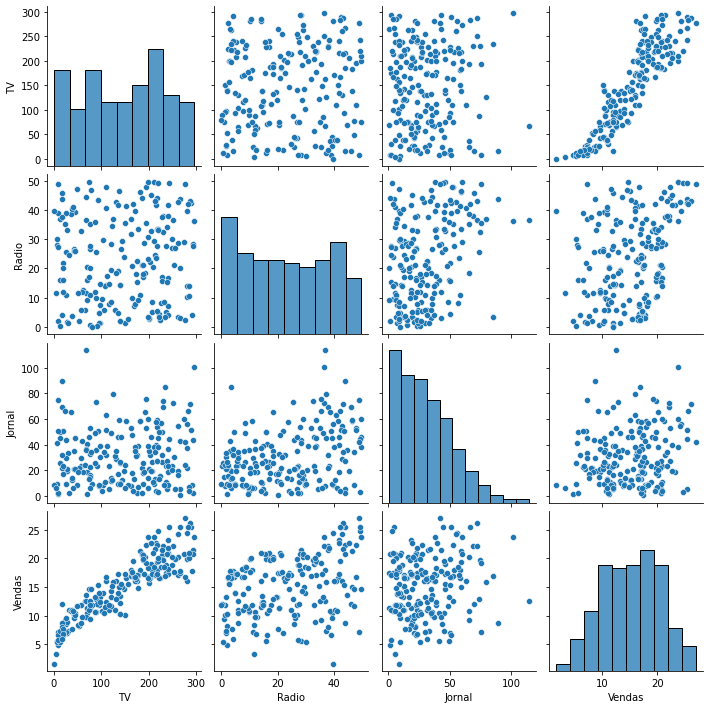

In [76]:
# Scatter Plot com Seaborn - Variação 1
sns.pairplot(df)

plt.show()

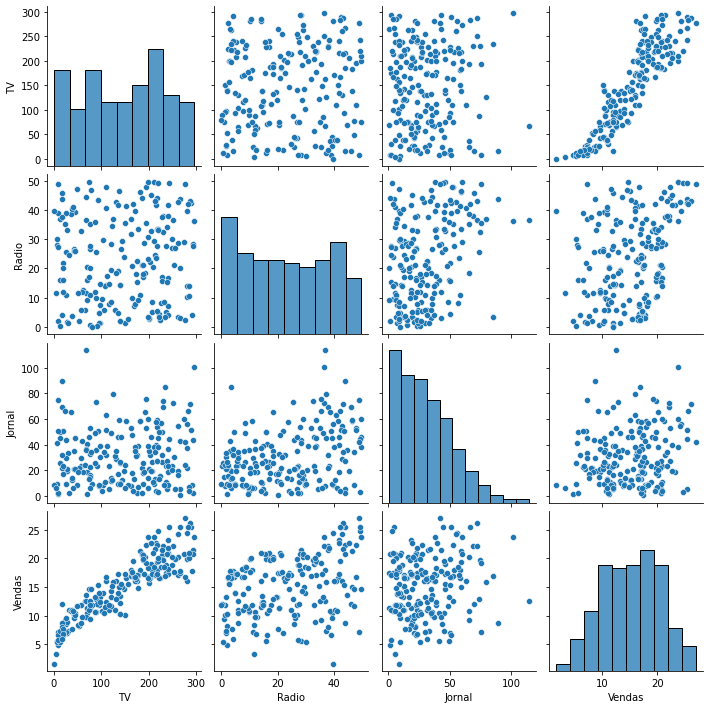

In [57]:
# Scatter Plot com Seaborn - Variação 1
sns.pairplot(df)

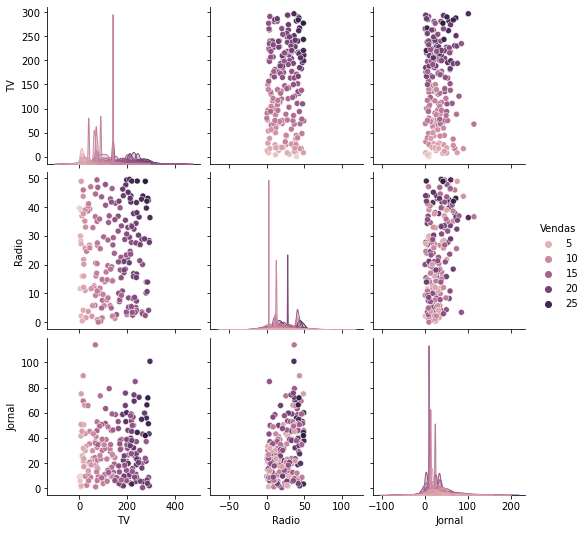

In [77]:
# Scatter Plot com Seaborn - Variação 2
sns.pairplot(df, hue = "Vendas", height = 2.5);

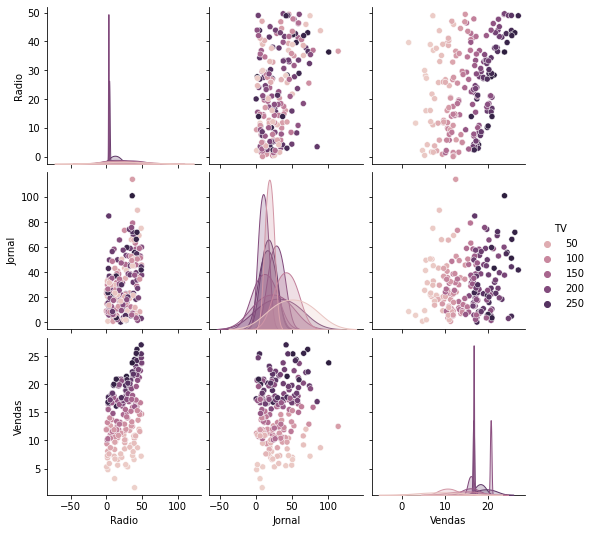

In [78]:
# Scatter Plot com Seaborn - Variação 2
sns.pairplot(df, hue = "TV", height = 2.5);

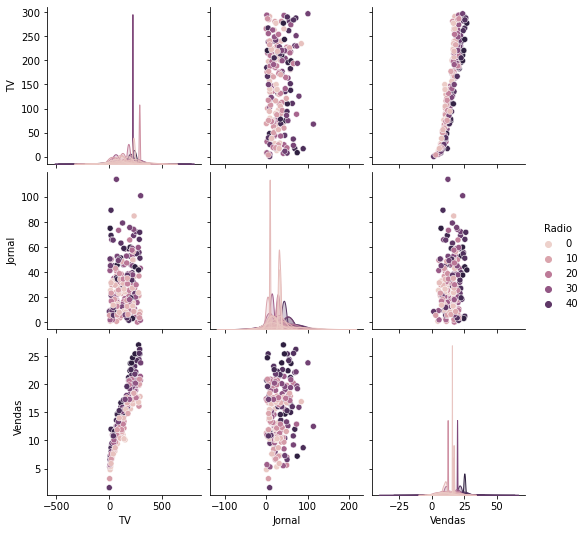

In [62]:
# Scatter Plot com Seaborn - Variação 2
sns.pairplot(df, hue = "Radio", height = 2.5);

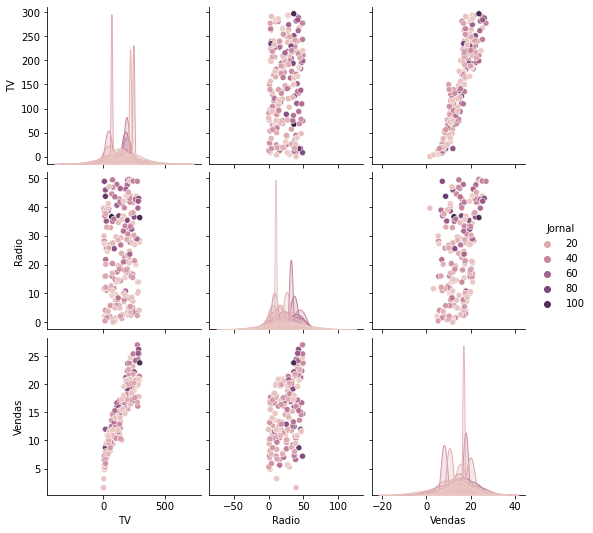

In [79]:
# Scatter Plot com Seaborn - Variação 2
sns.pairplot(df, hue = "Jornal", height = 2.5);

In [96]:
# Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning
# Separando em dados de treino e dados de teste

from sklearn.model_selection import train_test_split
 
y = df["Vendas"]
x = df.drop("Vendas", axis=1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

In [97]:

# Temos um problema de regressão - Vamos escolher os modelos que vamos usar:
# Regressão Linear
# RandomForest (Árvore de Decisão)

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# cria as inteligencias aritificiais
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# treina as inteligencias artificias
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [86]:
# Teste da AI e Avaliação do Melhor Modelo
# Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece
from sklearn import metrics

# criar as previsoes
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

# comparar os modelos
print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao))  

0.9071151423684273
0.9649451491947648


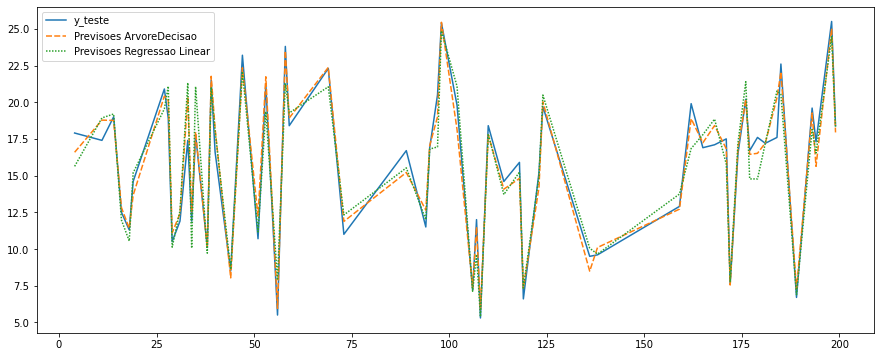

In [87]:
# Visualização Gráfica das Previsões

tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsoes ArvoreDecisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressaolinear

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

In [98]:
# Como fazer uma nova previsao
# importar a nova_tabela com o pandas (a nova tabela tem que ter os dados de TV, Radio e Jornal)
# previsao = modelo_randomforest.predict(nova_tabela)
# print(previsao)

nova_tabela = pd.read_csv("andreaafs100766/Sprint-I/novos.csv")
display(nova_tabela)
previsao = modelo_arvoredecisao.predict(nova_tabela)
print(previsao)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 7.523  8.518 19.798]


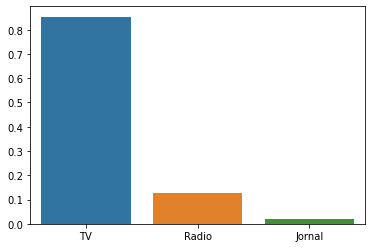

Radio     4652.8
Jornal    6110.8
dtype: float64
----------------
TV        29408.5
Jornal     6110.8
dtype: float64
----------------
TV       29408.5
Radio     4652.8
dtype: float64


In [99]:
# Qual a importância de cada variável para as vendas?

sns.barplot(x=x_treino.columns, y=modelo_arvoredecisao.feature_importances_)
plt.show()

# Caso queira comparar Radio com Jornal
print(df[["Radio", "Jornal"]].sum())
print('----------------')
print(df[["TV", "Jornal"]].sum())
print('----------------')
print(df[["TV", "Radio"]].sum())